In [264]:
import pandas as pd
csv_data = pd.read_csv('Data/features_30_sec.csv')
import matplotlib.pyplot  as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np 
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def preprocessing(data,n):
    X = data.iloc[:,19:59:2]
    y = data.iloc[:,-1]
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components = n)
    X = pca.fit_transform(X)
    return X
y = csv_data.iloc[:,-1]

In [174]:
def select_MinPts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data[i] - data)**2).sum(axis=1)**0.5)
        dist = np.sort(dist)
        k_dist.append(dist[k])
    k_dist = np.sort(k_dist)
    plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
    plt.show()
    return k_dist

In [202]:
def DBSCAN_predict_and_plot(eps,min_samples,X_data):
    plt.figure(figsize=(10, 10))
    y_pred = DBSCAN(eps=eps, min_samples=min_samples).fit(X_data)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_pred.labels_)
    plt.title(f'DBSCAN with data demention {min_samples//2}')
    plt.show()
    s_socre = metrics.silhouette_score(X_data, y_pred.labels_, metric='euclidean')
    return s_socre

In [321]:
def iterations(pca_eps_values,pca_min_samples,X):
    pca_dbscan_params = list(product(pca_eps_values, pca_min_samples))

    pca_no_of_clusters = []
    pca_sil_score = []
    pca_epsvalues = []
    pca_min_samp = []

    for p in pca_dbscan_params:
        pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

        pca_epsvalues.append(p[0])

        pca_min_samp.append(p[1])

        pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))

        pca_sil_score.append(metrics.silhouette_score(X, pca_dbscan_cluster.labels_))

    pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))

    pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])
    return pca_eps_min_df

In [240]:
X_2 = preprocessing(csv_data,2)
X_3 = preprocessing(csv_data,3)
X_4 = preprocessing(csv_data,4)
X_6 = preprocessing(csv_data,6)
X_8 = preprocessing(csv_data,8)
X_10 = preprocessing(csv_data,10)
X_12 = preprocessing(csv_data,12)
X_14 = preprocessing(csv_data,14)
X_16 = preprocessing(csv_data,16)

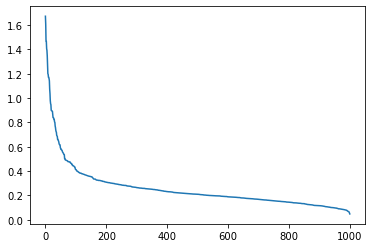

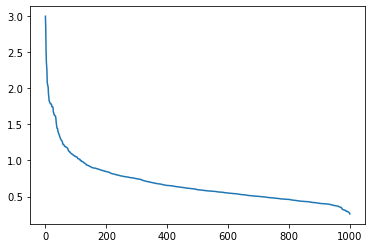

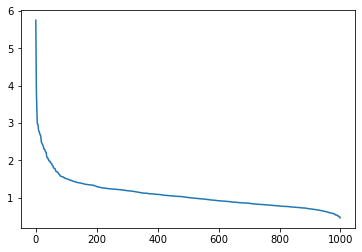

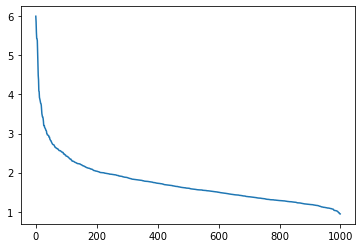

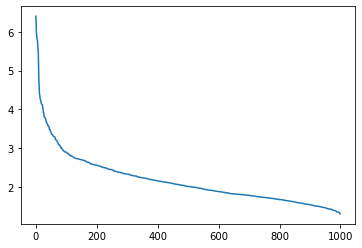

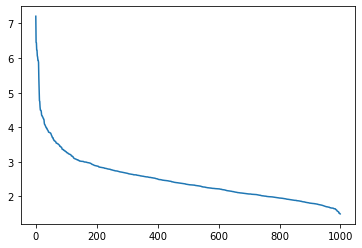

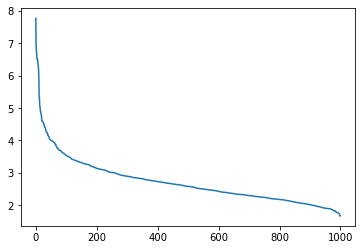

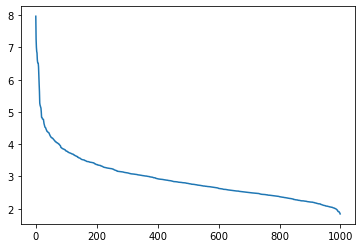

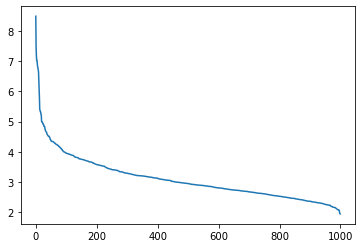

In [241]:
k_dist_2 = select_MinPts(X_2,k=3)   # 此处k取 2*2 -1 
k_dist_3 = select_MinPts(X_3,k=5) 
k_dist_4 = select_MinPts(X_4,k=7)   
k_dist_6 = select_MinPts(X_6,k=11)   
k_dist_8 = select_MinPts(X_8,k=15) 
k_dist_10 = select_MinPts(X_10,k=19)   
k_dist_12 = select_MinPts(X_12,k=23)
k_dist_14 = select_MinPts(X_14,k=27)   
k_dist_16 = select_MinPts(X_16,k=31)  

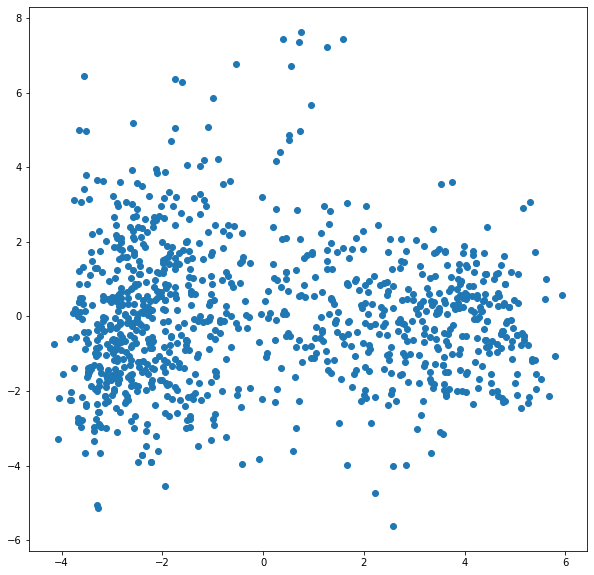

In [239]:
plt.figure(figsize=(10, 10))
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.show()

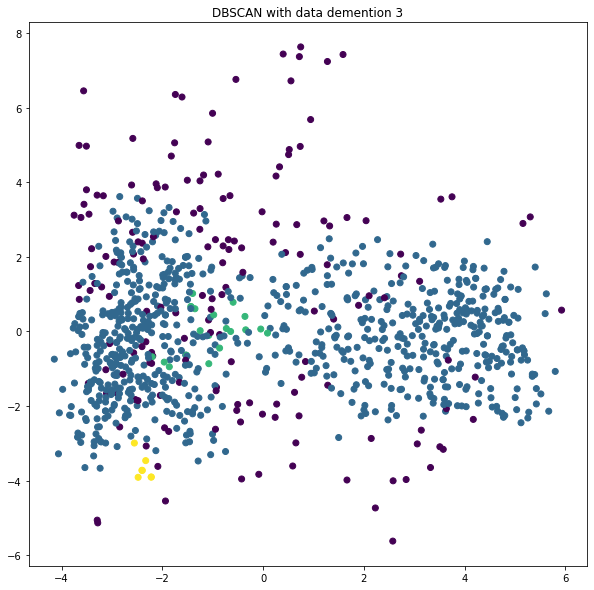

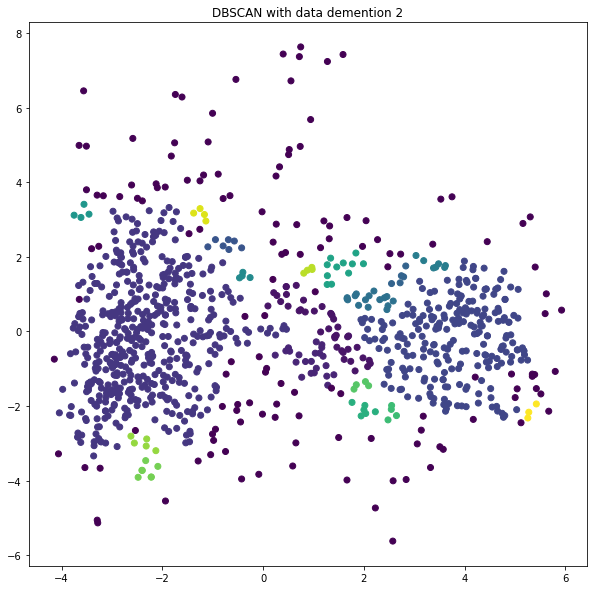

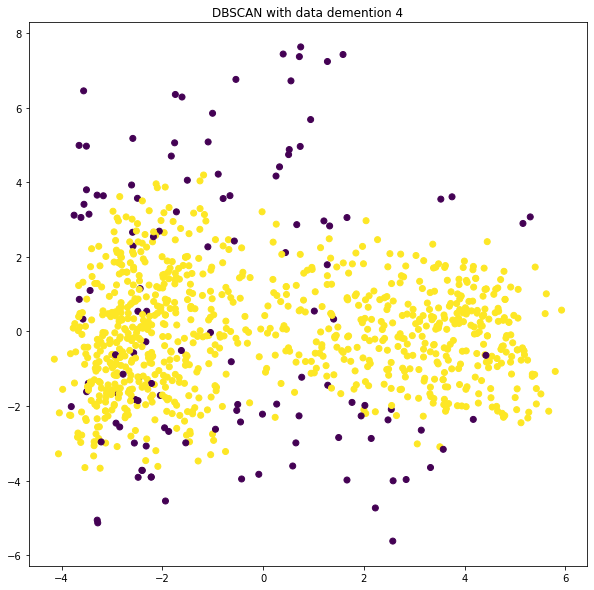

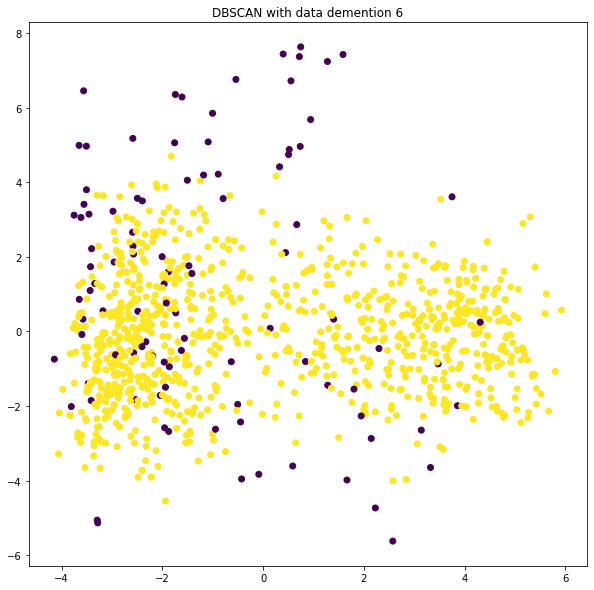

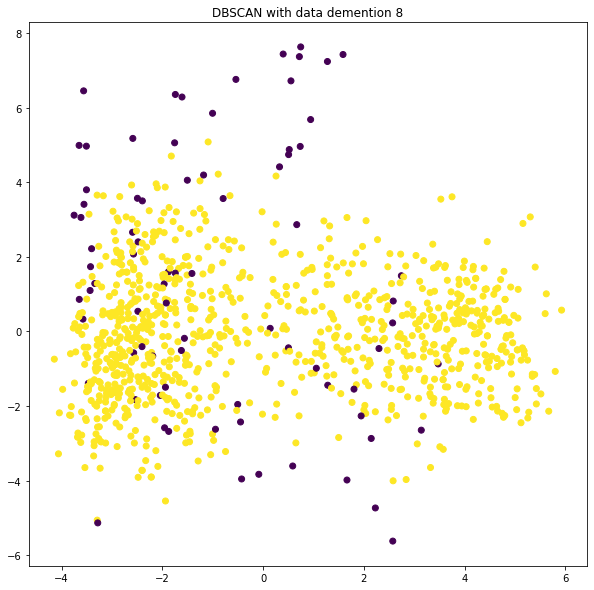

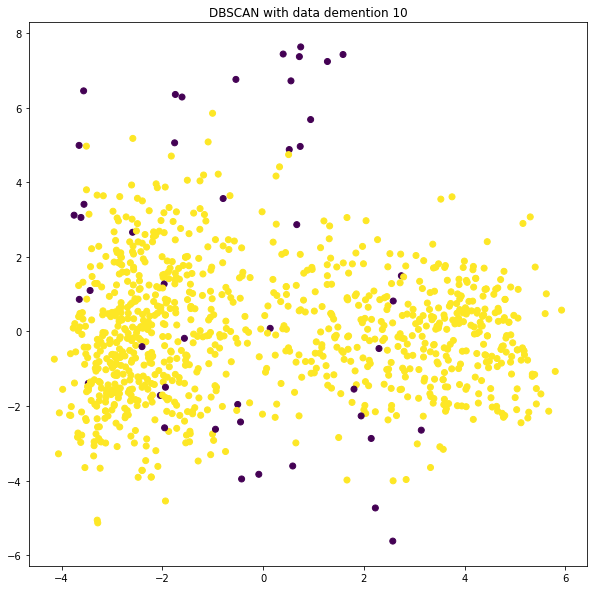

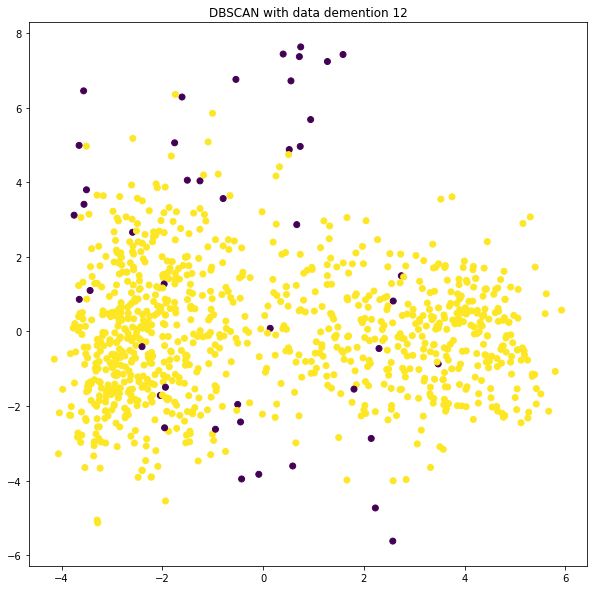

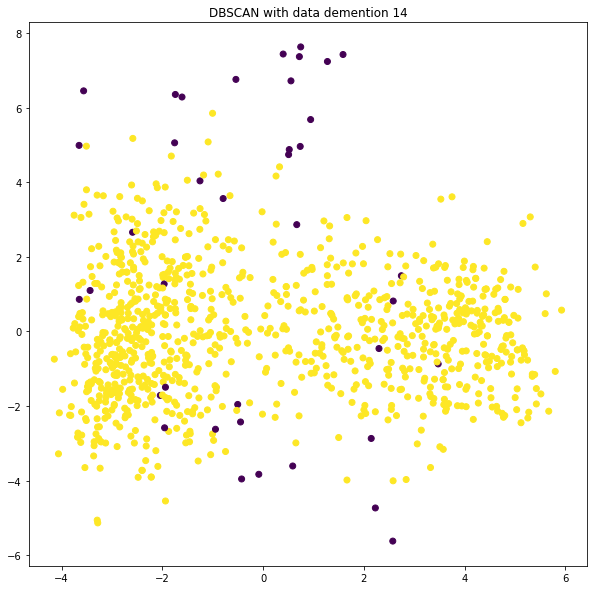

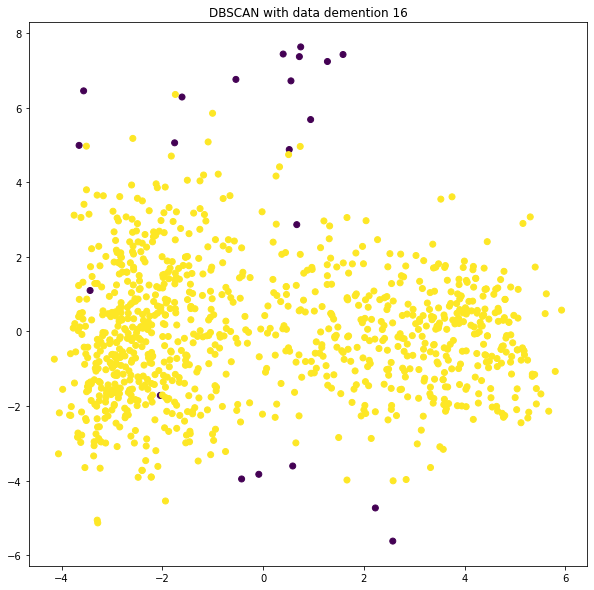

In [312]:
eps_list = [0.3,1.2,1.9,2.4,2.9,3.2,3.4,3.8]
s_score = []

score_3 = DBSCAN_predict_and_plot(0.75,6,X_3)
for i in range(0,len(eps_list)):
    score = DBSCAN_predict_and_plot(eps_list[i],4*(i+1),eval(f'X_{(i+1)*2}'))
    s_score.append(score)

s_score.insert(1,score_3)

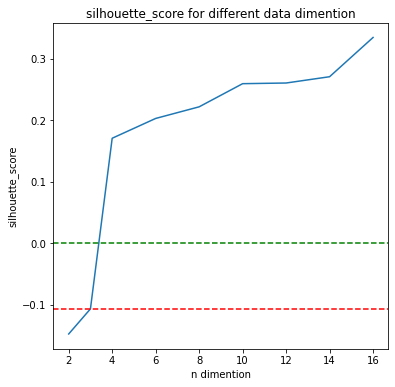

In [253]:
plt.figure(figsize=(6, 6))
plt.plot([2,3,4,6,8,10,12,14,16],s_score)
plt.title("silhouette_score for different data dimention")
plt.ylabel("silhouette_score")
plt.xlabel("n dimention")
plt.axhline(y = score_3, color = 'red', linestyle = "--")
plt.axhline(y = 0, color = 'green', linestyle = "--")
plt.show()

## 数据维度为3

Counter({0: 804, -1: 169, 1: 20, 2: 7})

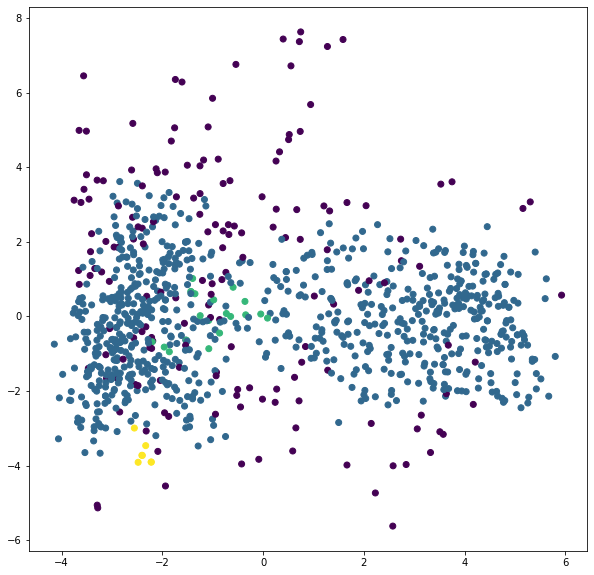

In [290]:
y_pred = DBSCAN(eps=0.75,min_samples=6).fit(X_3)
plt.figure(figsize=(10, 10))
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_pred.labels_)
Counter(y_pred.labels_)

In [322]:
pca_eps_values = np.arange(0.5,1,0.05)

pca_min_samples = np.arange(4,10)

pca_eps_min_df = iterations(pca_eps_values,pca_min_samples,X_3)

In [323]:
pca_eps_min_df["silhouette_score"]  = abs(pca_eps_min_df["silhouette_score"])
pca_eps_min_df["silhouette_score"].argmin()

43

In [317]:
pca_eps_min_df.iloc[43,:]

no_of_clusters      4.000000
silhouette_score    0.006078
epsilon_values      0.850000
minimum_points      5.000000
Name: 43, dtype: float64

Counter({0: 918, -1: 72, 1: 5, 2: 5})

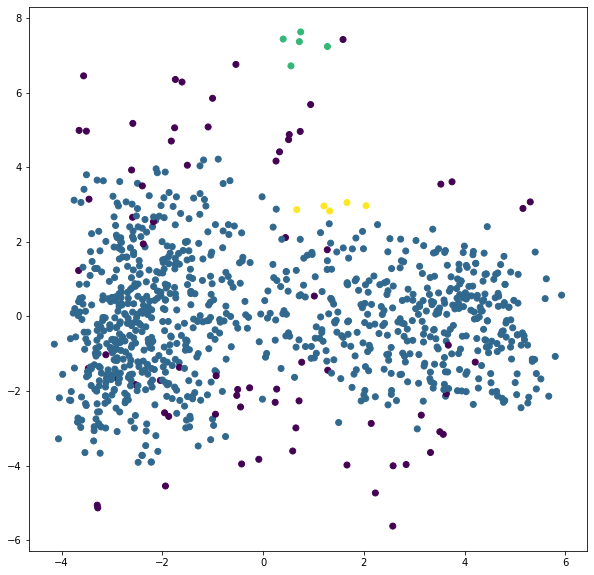

In [289]:
y_pred_best = DBSCAN(eps=0.85,min_samples=5).fit(X_3)
plt.figure(figsize=(10, 10))
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_pred_best.labels_)
Counter(y_pred_best.labels_)

### 数据维度为2

Counter({0: 68,
         15: 12,
         1: 485,
         -1: 99,
         2: 241,
         3: 7,
         4: 3,
         13: 4,
         5: 5,
         6: 16,
         7: 7,
         8: 3,
         9: 4,
         10: 4,
         11: 3,
         12: 3,
         14: 3,
         16: 6,
         17: 4,
         18: 3,
         20: 6,
         19: 7,
         21: 4,
         22: 3})

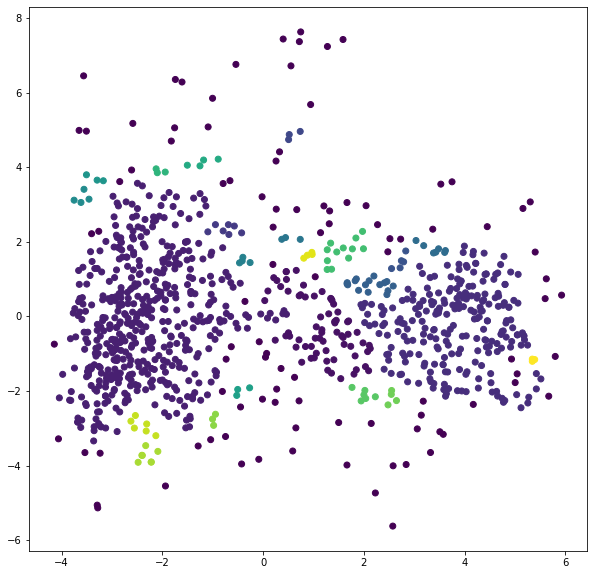

In [291]:
y_pred_2 = DBSCAN(eps=0.3,min_samples=3).fit(X_2)
plt.figure(figsize=(10, 10))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_pred_2.labels_)
Counter(y_pred_2.labels_)

In [318]:
pca_eps_values = np.arange(0.2,0.4,0.01)

pca_min_samples = np.arange(2,4)

pca_eps_min_df = iterations(pca_eps_values,pca_min_samples,X_2)

In [319]:
pca_eps_min_df["silhouette_score"]  = abs(pca_eps_min_df["silhouette_score"])
pca_eps_min_df["silhouette_score"].argmin()

31

In [294]:
pca_eps_min_df.iloc[31,:]

no_of_clusters      14.00000
silhouette_score     0.02329
epsilon_values       0.35000
minimum_points       3.00000
Name: 31, dtype: float64

Counter({0: 382,
         1: 505,
         -1: 72,
         2: 7,
         3: 3,
         4: 3,
         9: 4,
         5: 3,
         6: 4,
         8: 4,
         7: 4,
         12: 3,
         10: 3,
         11: 3})

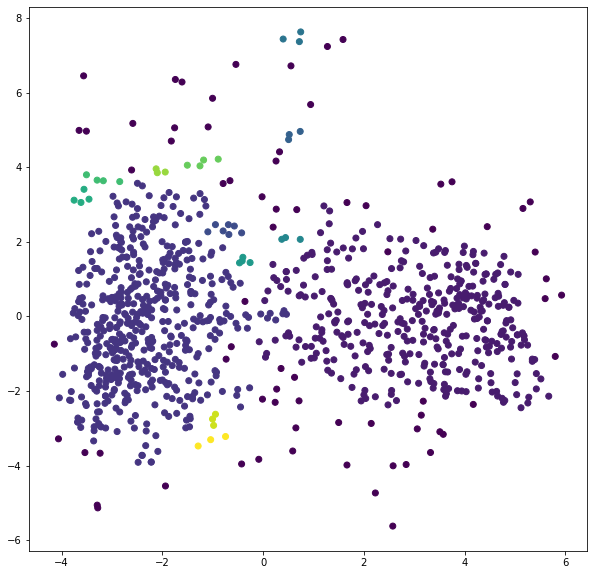

In [301]:
y_pred_best = DBSCAN(eps= 0.35,min_samples=3).fit(X_2)
plt.figure(figsize=(10, 10))
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_pred_best.labels_)
Counter(y_pred_best.labels_)

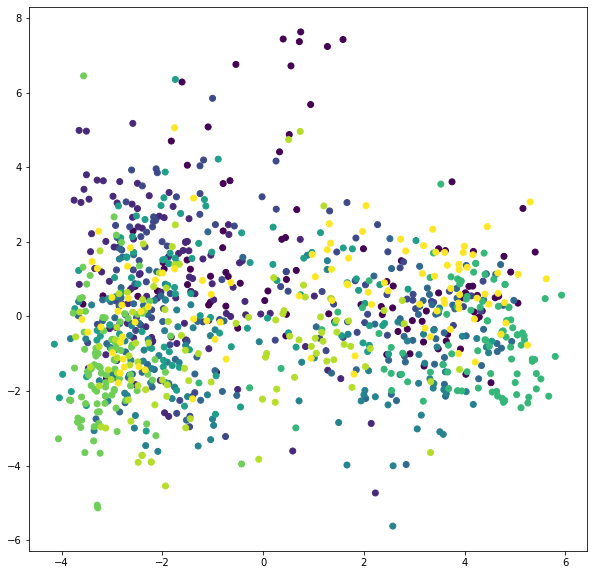

In [311]:
true_label = []
for i in range(10):
    one_list = 100*[i]
    true_label += one_list
plt.figure(figsize=(10, 10))
plt.scatter(X_3[:, 0], X_3[:, 1], c=true_label)